<a href="https://colab.research.google.com/github/ganduerr/Belajar-Js-with-sunny/blob/master/vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

im = "https://ultralytics.com/images/zidane.jpg"


/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-12-19 Python-3.10.12 torch-2.5.1+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 29.6MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
results = model(im)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,745.578735,48.470245,1142.694336,720.000000,0.868910,0,person
1,124.744019,197.334442,844.397461,716.650635,0.630325,0,person
2,441.238708,439.350586,498.380737,708.571045,0.616792,27,tie
3,594.081787,377.300323,635.423950,437.147797,0.274013,67,cell phone


In [ ]:
import cv2
import torch
from PIL import Image


In [ ]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-19 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
# Images
for f in "zidane.jpg", "bus.jpg":
    torch.hub.download_url_to_file("https://ultralytics.com/images/" + f, f)  # download 2 images
im1 = Image.open("zidane.jpg")  # PIL image
im2 = cv2.imread("bus.jpg")[..., ::-1]  # OpenCV image (BGR to RGB)

100%|██████████| 49.2k/49.2k [00:00<00:00, 974kB/s]
100%|██████████| 134k/134k [00:00<00:00, 1.17MB/s]


In [ ]:
# Inference
results = model([im1, im2], size=640)  # batch of images

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
# Results
results.print()
results.save()  # or .show()

image 1/2: 720x1280 2 persons, 1 tie, 1 cell phone
image 2/2: 1080x810 4 persons, 1 bus
Speed: 29.2ms pre-process, 702.7ms inference, 3.0ms NMS per image at shape (2, 3, 640, 640)
Saved 2 images to runs/detect/exp


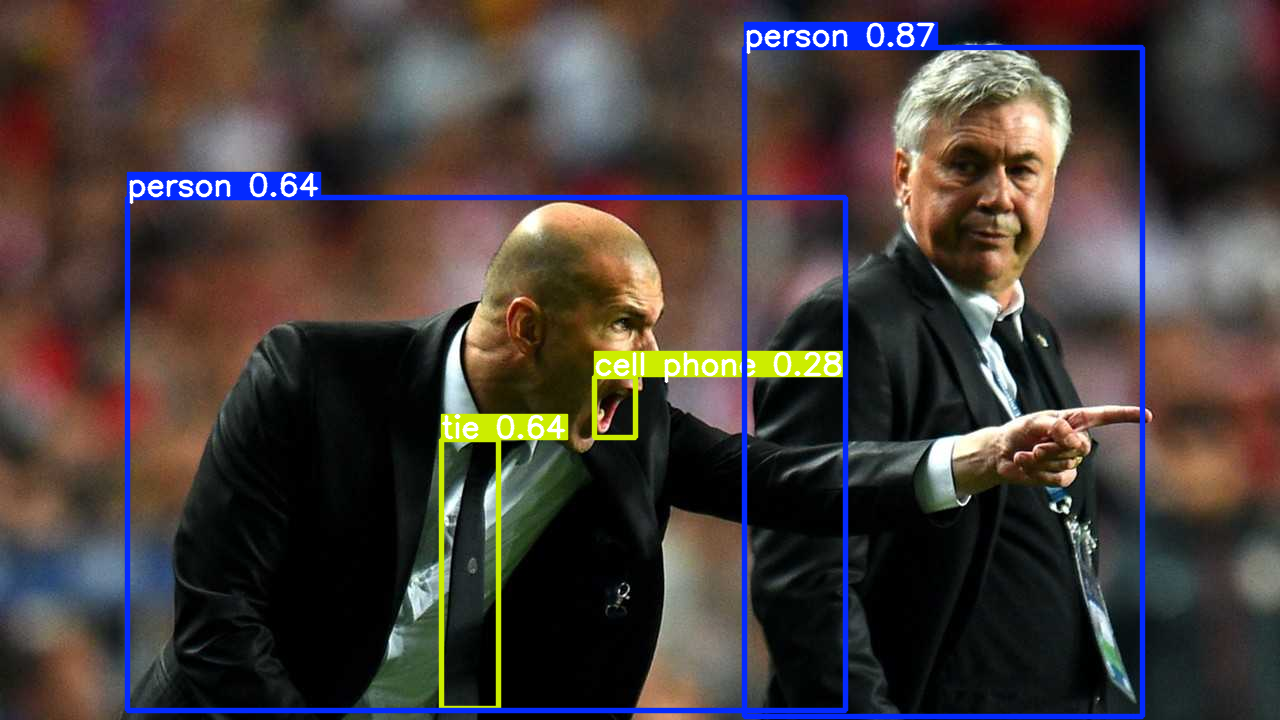

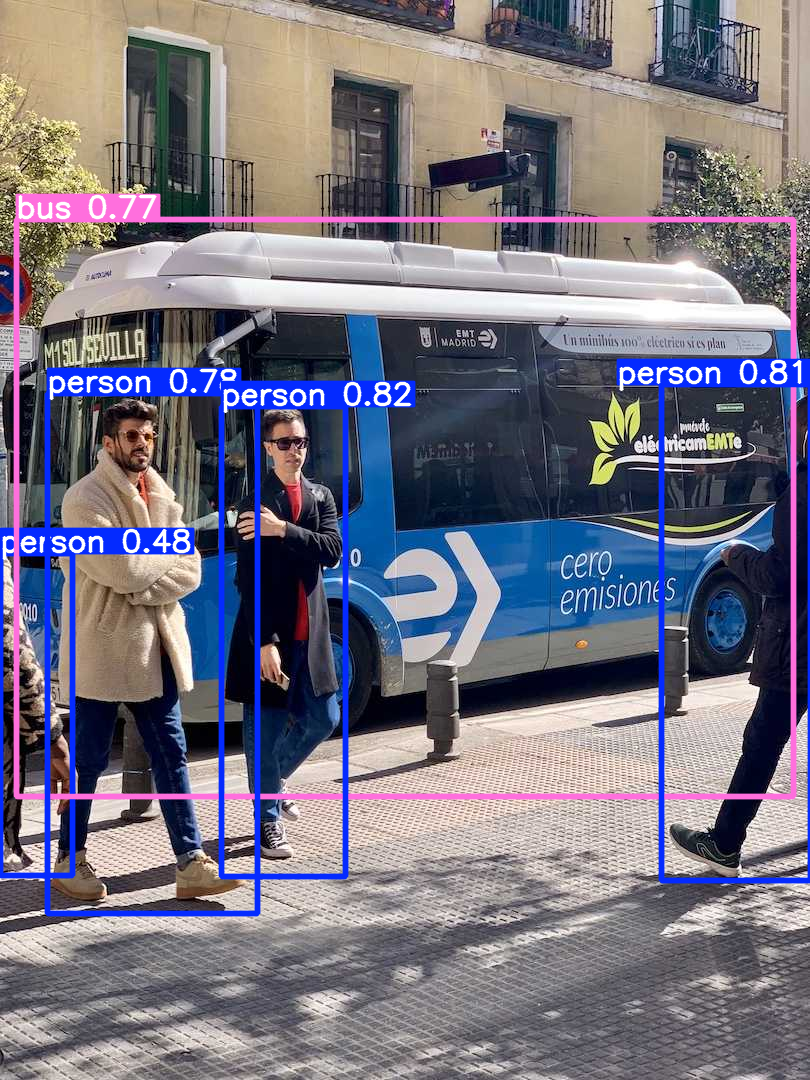

In [ ]:
results.show()